In [2]:
%pylab inline

import pandas
ducolors=['#321F20', '#7E317B', '#D8ACE0', '#006388', '#AA2B4A', '#CFDAD1', '#C4E5FA', '#C43B8E', '#91B8BD', '#968E85']

Populating the interactive namespace from numpy and matplotlib


In [3]:
with open("../data/jla_data_toconvert.txt", 'r') as jlaraw:
    jlarawstr = jlaraw.read()
    
jlarawlines = jlarawstr.split("\n")

i = 0
headings = []
while (jlarawlines[i] != r"#end"):
    thisline = jlarawlines[i]
    i+=1
    if thisline[0] == r"@":
        continue
    else:
        headings.append(thisline[1:-1])
        
#SNTYPE, SURVEY and name have str type but all others have float type
types = []

for heading in headings:
    if heading in ['STNYPE', 'SURVEY', 'name']:
        types.append(np.str_)
    else:
        types.append(np.float_)

# now we actually need to parse data into an array. This is going to be very messy. Sorry, future me if this breaks.
fulllist = []

for line in jlarawlines:
    if line:
        if (line[0]=='#') or (line[0]=='@'):
            continue
        else:
            thisarry = np.empty_like(types)
            thislist = line.split("  ")
            for i in range(len(thisarry)):
                thisarry[i] = thislist[i]
        
            fulllist.append(thisarry)
            

fullarray = np.array(fulllist)

jla = pandas.DataFrame(data=fullarray, columns=headings)

In [4]:
def ra(survey, correction=0, df=jla):
    # gets ra from jla data, corrects by correction in deg. returns in rads
    return (array(df.loc[df['SURVEY']==survey]['RA'], dtype=float) - correction)*(pi/180)


def dec(survey, correction=0, df=jla):
    # same as above but dec. correction is always 0
    return (array(df.loc[df['SURVEY']==survey]['DEC'], dtype=float) - correction)*(pi/180)


def z(survey, df=jla):
    # gets ra from jla data, corrects by correction in deg. returns in rads
    return array(df.loc[df['SURVEY']==survey]['z'], dtype=float)


def msb(survey, df=jla):
    # gets ra from jla data, corrects by correction in deg. returns in rads
    return array(df.loc[df['SURVEY']==survey]['msb'], dtype=float)


def msbe(survey, df=jla):
    # gets ra from jla data, corrects by correction in deg. returns in rads
    return array(df.loc[df['SURVEY']==survey]['msbe'], dtype=float)



surveys = ['SDSS', 'SNLS', 'RiessHST', 'CalanTololo', 'CfAI', 'CfAII', 'CfAIII', 'lowz', 'CSP']
ra_corr = [0, 180, 180, 180, 180, 180, 180, 180, 180]
dec_corr = [0] * len(ra_corr)

In [5]:
# separate all data by survey for sick plots
ras = empty(len(surveys), dtype=object)
decs = empty(len(surveys), dtype=object)
zs = empty(len(surveys), dtype=object) 
msbs = empty(len(surveys), dtype=object)
msbes = empty(len(surveys), dtype=object)

for i in range(len(surveys)):
    survey = surveys[i]
    ras[i] = ra(survey, correction=ra_corr[i])
    decs[i] = dec(survey, correction=dec_corr[i])
    zs[i] = z(survey)
    msbs[i] = msb(survey)
    msbes[i] = msbe(survey)

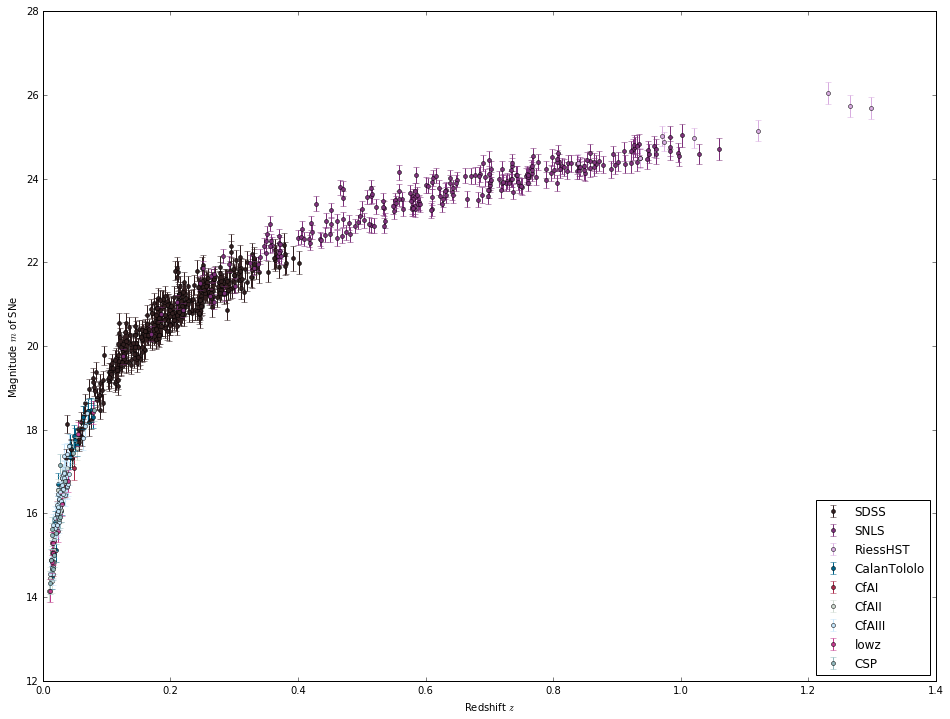

In [6]:
figure(figsize=(16, 12))

for i in range(len(surveys)):
    survey = surveys[i]
    color = ducolors[i]
    thisz = zs[i]
    thismsb = msbs[i]
    thismsbe = msbes[i]
    
    errorbar(thisz,
             thismsb,
             yerr=thismsbe*2,
             color=color,
             fmt='o',
             ms=4,
             label=survey) 

legend(loc=4, numpoints=1)
ylabel('Magnitude $m$ of SNe')
xlabel('Redshift $z$')

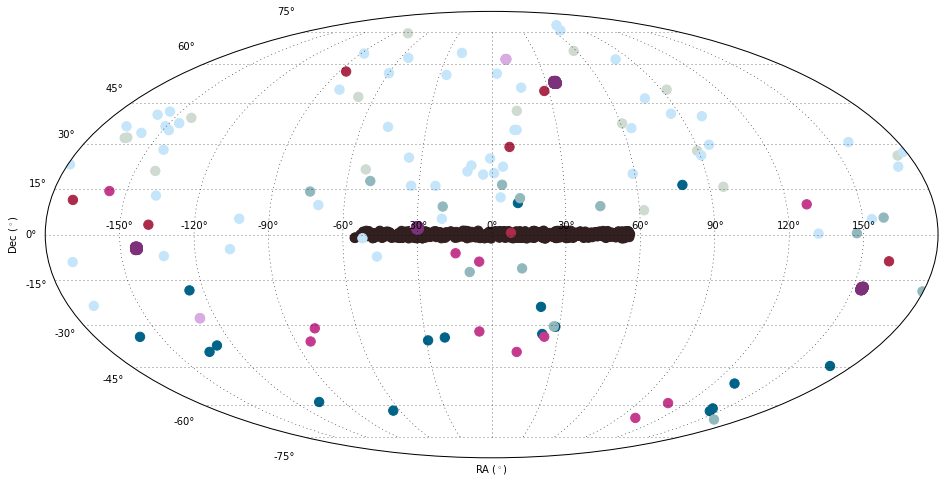

In [7]:
fig = pylab.figure(figsize=(16,12))
ax = fig.add_subplot(111, projection="mollweide")
ax.grid(True)


for i in range(len(surveys)):
    survey = surveys[i]
    color = ducolors[i]
    thisra = ras[i]
    thisdec = decs[i]
    thisz = zs[i]
    thismsb = msbs[i]
    thismsbe = msbes[i]
    
    scatter(thisra,
         thisdec,
         color=color,
         marker='o',
         s=100*exp(-thismsbe),
         label=survey)

xlabel('RA ($^\circ$)')
ylabel('Dec ($^\circ$)')

In [8]:
headings

['z',
 'c',
 'ce',
 'msb',
 'msbe',
 'dm',
 'dme',
 'x0',
 'x0e',
 'x1',
 'x1e',
 'cmsb_c',
 'cx0_c',
 'cdm_c',
 'x0x1_c',
 'msbdm_c',
 'cx1_c',
 'dmx0_c',
 'msbx0_c',
 'dmx1_c',
 'msbx1_c',
 'name',
 'chi2/dof',
 'dof',
 'TRESTMIN',
 'TRESTMAX',
 'X_FOCAL_PLANE',
 'Y_FOCAL_PLANE',
 'RA',
 'DEC',
 'Z_HELIO',
 'Z_CMB',
 'MWEBV',
 'SNTYPE',
 'SURVEY',
 'LCSRC_0',
 '3rdvar',
 'e3rdvar',
 'pecvel',
 'dz_pecvel',
 'dbmag_pecvel',
 'dbmag_malm',
 'sigma_coh',
 'sigma_lens']